# Preparation

In [97]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.dpi'] = 100

In [98]:
df = pd.read_csv('data/GlobalLandTemperaturesByMajorCity.csv')
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


# Basic props of dataset

In [99]:
# Col names & data types
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [100]:
# Random sample with few key cols
df[['dt', 'AverageTemperature', 'City', 'Country']].sample(2, random_state=42)

,dt,AverageTemperature,City,Country
165402,1867-08-01,26.949,Nanjing,China
18258,1872-12-01,21.859,Bangalore,India


In [101]:
# No. of samples
len(df)

239177

In [102]:
# Values per column
df.count()

dt                               239177
AverageTemperature               228175
AverageTemperatureUncertainty    228175
City                             239177
Country                          239177
Latitude                         239177
Longitude                        239177
dtype: int64

In [103]:
# Size info, including memory usage
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
dt                               239177 non-null object
AverageTemperature               228175 non-null float64
AverageTemperatureUncertainty    228175 non-null float64
City                             239177 non-null object
Country                          239177 non-null object
Latitude                         239177 non-null object
Longitude                        239177 non-null object
dtypes: float64(2), object(5)
memory usage: 77.1 MB


# Column summary

In [104]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [105]:
# stats summary for numerical features
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,228175.0,18.125969,10.024800,-26.772,12.71,20.428,25.918,38.283
AverageTemperatureUncertainty,228175.0,0.969343,0.979644,0.040,0.34,0.592,1.320,14.037


In [106]:
# stats summary for categorical features
df.describe(exclude=np.float, include=np.object).transpose()
# top: most common value
# freq: most common value's frequency

,count,unique,top,freq
dt,239177,3239,1901-05-01,100
City,239177,100,Montreal,3239
Country,239177,49,India,36582
Latitude,239177,49,31.35N,13875
Longitude,239177,93,31.38E,6801


In [107]:
df['Country'].value_counts()[:10]

India            36582
China            35444
Brazil           12930
Turkey            9473
United States     8455
Egypt             7589
Pakistan          7355
Russia            6478
Canada            6478
Nigeria           5763
Name: Country, dtype: int64

# Text Categories

In [108]:
df['Country'].nunique()

49

In [109]:
df['City'].nunique()

100

In [110]:
cat_df = df.groupby('Country') \
    .agg({'City': pd.Series.nunique, 'dt': pd.Series.count}) \
    .rename(columns={'City': 'No. of cities', 'dt': 'No. of readings'}) \
    .sort_values('No. of cities', ascending=False)
cat_df.head(5)

,No. of cities,No. of readings
Country,,
China,16,35444
India,14,36582
Brazil,6,12930
Nigeria,3,5763
Turkey,3,9473


In [111]:
cat_df.describe()

,No. of cities,No. of readings
count,49.000000,49.000000
mean,2.040816,4881.163265
std,2.864722,6892.632662
min,1.000000,1591.000000
25%,1.000000,2025.000000
50%,1.000000,2613.000000
75%,2.000000,4146.000000
max,16.000000,36582.000000


# Visualizing

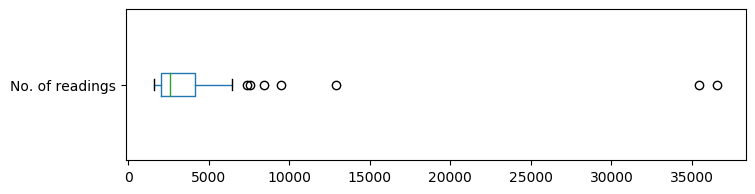

In [112]:
cat_df[['No. of readings']].plot(kind='box', vert=False, figsize=(8,2))

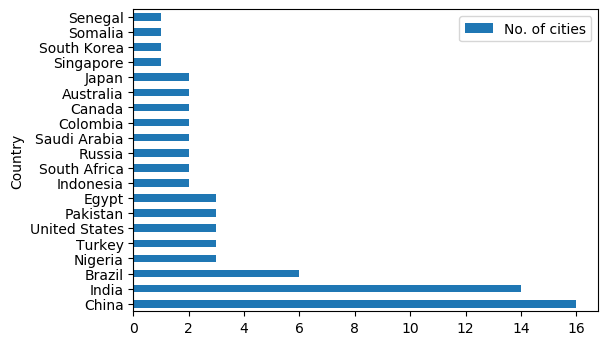

In [113]:
cat_df[['No. of cities']][:20].plot(kind='barh')

In [114]:
def box_plot(x, y, df_country):
    ordered_values = df_country.groupby(x)[[y]].median().sort_values(y,             ascending=False).index
    plt.xticks(rotation=90) 
    sns.boxplot(x=y,y=x, data=df_country, order=ordered_values)

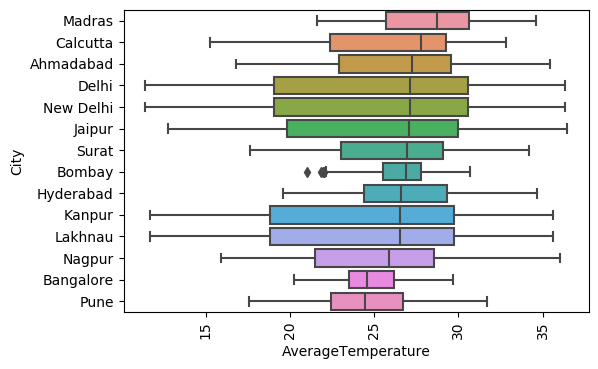

In [115]:
box_plot('City', 'AverageTemperature', df[df['Country'] == 'India'])

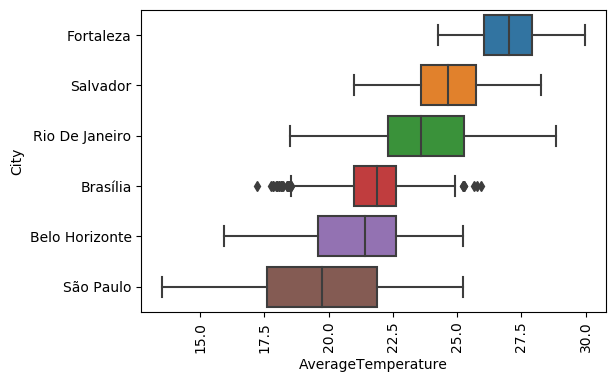

In [116]:
box_plot('City', 'AverageTemperature', df[df['Country'] == 'Brazil'])

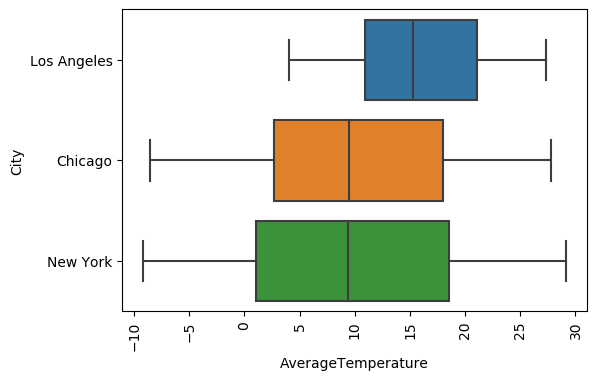

In [117]:
box_plot('City', 'AverageTemperature', df[df['Country'] == 'United States'])

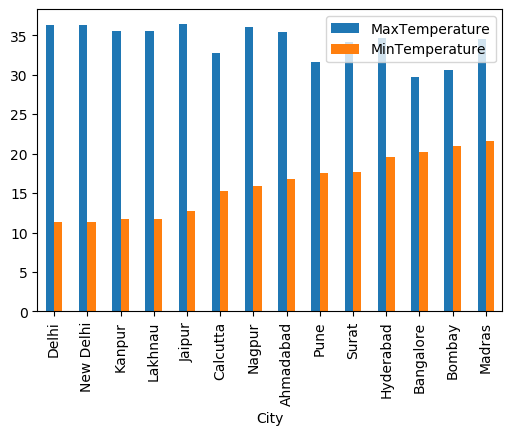

In [118]:
df_country = df[df['Country'] == 'India']
max_temp = df_country.groupby('City') \
.agg({'AverageTemperature': pd.Series.max}) \
.rename(columns={'AverageTemperature': 'MaxTemperature'})

min_temp = df_country.groupby('City') \
.agg({'AverageTemperature': pd.Series.min}) \
.rename(columns={'AverageTemperature': 'MinTemperature'})

median_temp = df_country.groupby('City') \
.agg({'AverageTemperature': pd.Series.median}) \
.rename(columns={'AverageTemperature': 'MedianTemperature'})

temp_trends = pd.merge(max_temp, min_temp, on='City') \
    .sort_values('MinTemperature', ascending=True)

temp_trends.plot(kind='bar')
